In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import glob
import math

In [3]:
files = glob.glob(".\FDDB-folds\FDDB-fold-[0-8]?-ellipseList.txt")


In [4]:
#Read files with ANNOTATIONS

#create a dic containing image's path as KEY. LIST of ellipsis as VALUE

dict_annotation_faces = {}

for file in files:
    
    with open(file) as file_annotation:
        
        while(True):
            
            path_file_image = file_annotation.readline()
            
            if not path_file_image:
                break
                
            nbre_faces = file_annotation.readline()
            
            for _ in range(int(nbre_faces)):
                dict_annotation_faces.setdefault(path_file_image.strip("\n"), []).append(file_annotation.readline().strip("\n"))
            
            


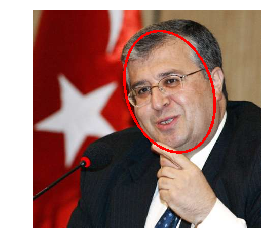

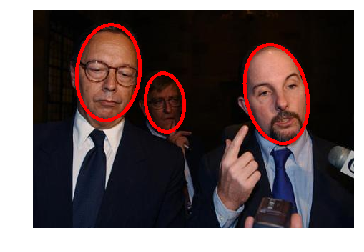

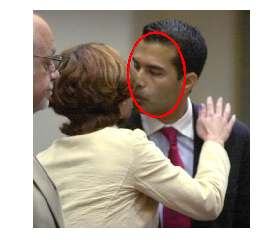

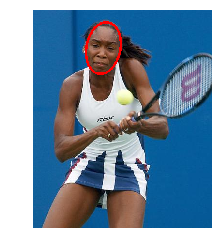

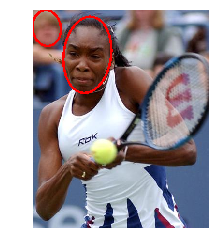

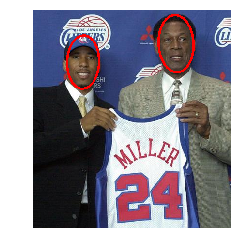

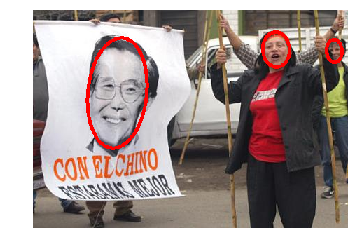

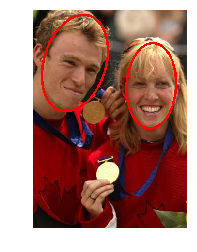

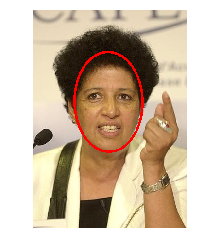

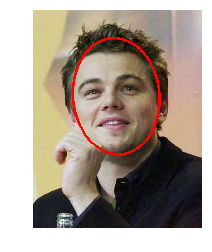

In [5]:
#display ellipsis

for image_path, ellipse_coords in list(dict_annotation_faces.items())[:10]:
    
    img = cv.imread("./originalPics/"+image_path+".jpg")
            
    #Doing some treatment in the LIST of ellipsis that contains coordinate as STRING (list of strings)
    for coord in ellipse_coords:
        liste_coord = [float(i) for i in coord.split(" ")[:5]]
        major_axis = int(max(liste_coord[0], liste_coord[1]))
        minor_axis = int(min(liste_coord[0], liste_coord[1]))
        center_x, center_y = int(liste_coord[3]), int(liste_coord[4])
        angle = int(math.degrees(liste_coord[2]))
        color = (0,0,255)
        start_angle = 0
        end_angle = 360
        img = cv.ellipse(img, (center_x, center_y),(major_axis, minor_axis), angle,start_angle,end_angle,color,3)
        
    #Show pictrues
    plt.axis("off")
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()